In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /Users/varun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/varun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/varun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/varun/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
DATA_DIR = "../data/"

In [3]:
data = pd.read_csv(os.path.join(DATA_DIR,os.listdir(DATA_DIR)[0]),index_col=["Unnamed: 0"])

In [4]:
data.head()

,user,text,favorite_count,retweet_count,created_at
0,elonmusk,"@EvaFoxU @BillyM2k Hopefully, as soon as next ...",298,30,2022-11-09 19:22:40+00:00
1,elonmusk,@BillyM2k Totally agree!,1417,87,2022-11-09 19:15:15+00:00
2,elonmusk,"@TOIPlus Nope, I was alway 🥜 !",27360,1397,2022-11-09 17:58:22+00:00
3,elonmusk,@ZubyMusic Yeah,2740,72,2022-11-09 17:57:21+00:00
4,elonmusk,@lawrencekitema @SpaceNews_Inc Congratulations!,2034,103,2022-11-09 17:37:21+00:00


### We want to remove created_at and user columns from the data frame

In [5]:
data.drop(['user','created_at'],axis=1,inplace=True)

## Lets do some basic EDA

#### 1) Checking the number of Null Values

In [6]:
data.isna().sum()

text              0
favorite_count    0
retweet_count     0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 0 to 188
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            189 non-null    object
 1   favorite_count  189 non-null    int64 
 2   retweet_count   189 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.9+ KB


##### No null values detected in the data

#### 2) Top 10 Favorite Tweets

In [8]:
sorted_dataframe = data.sort_values(['favorite_count'],ascending=False).groupby('text').head()

/Users/varun/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

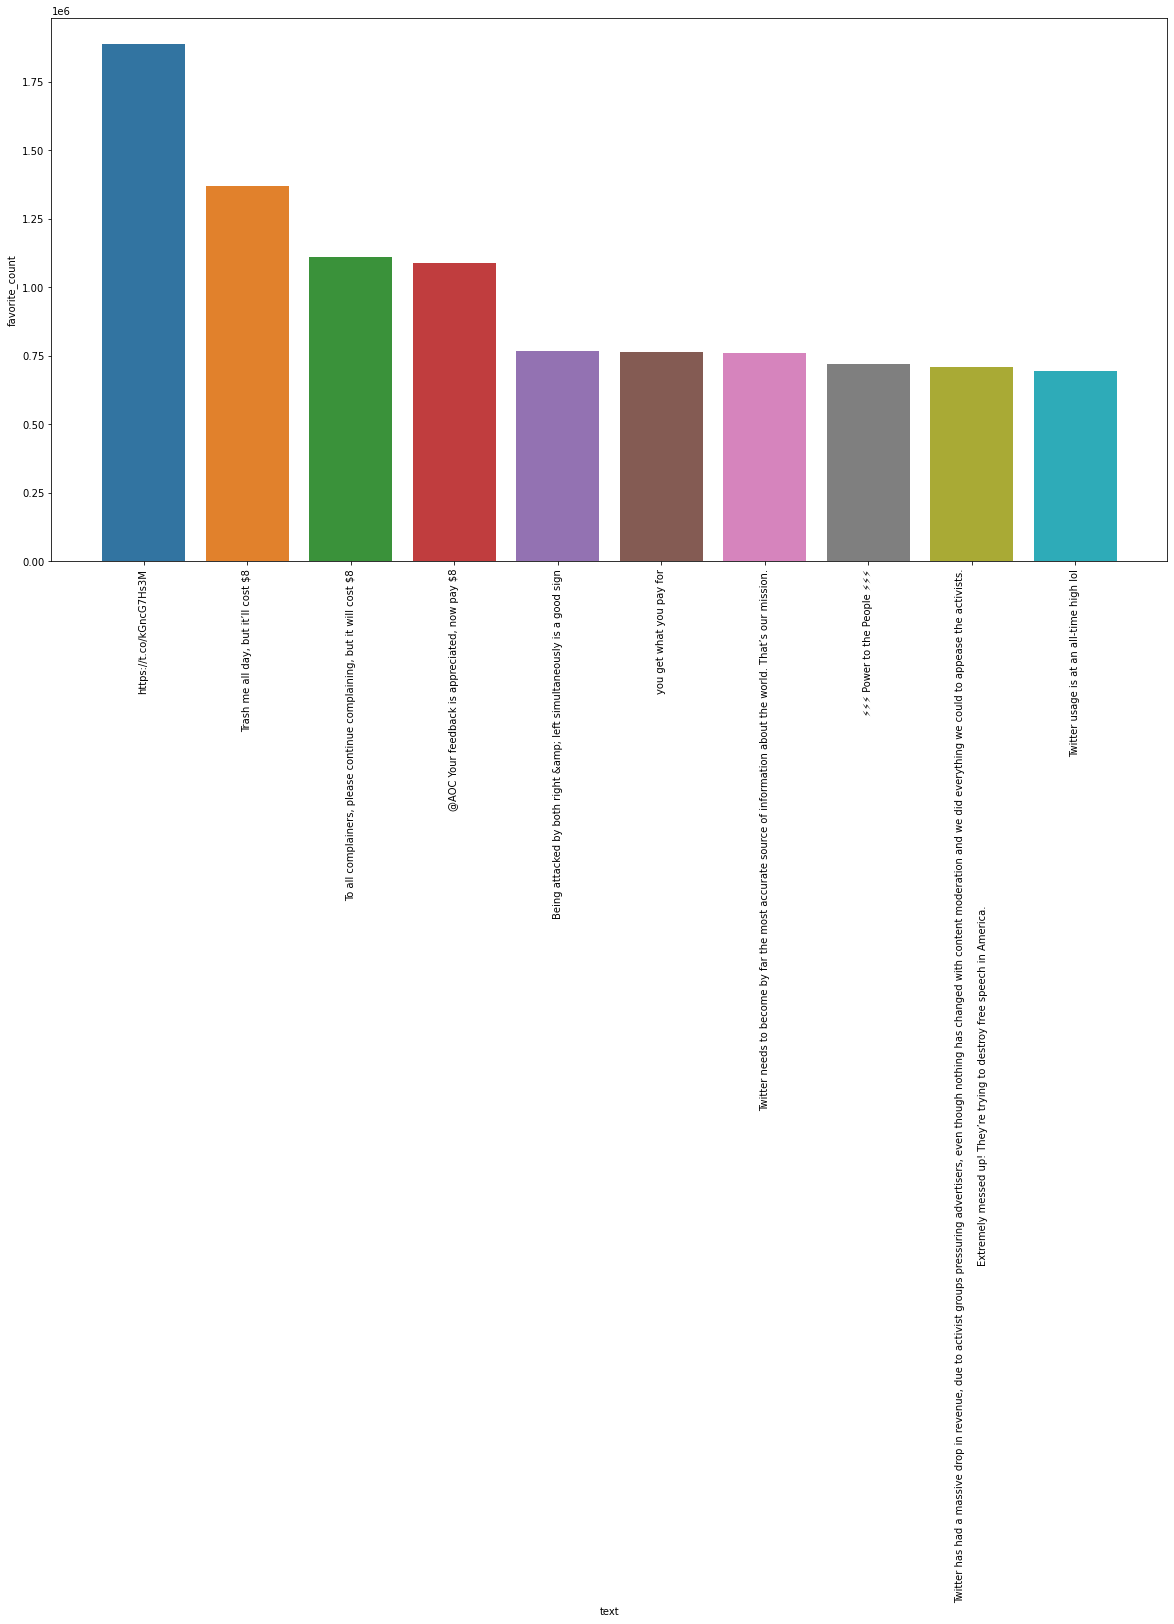

In [9]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(sorted_dataframe['text'][:10],sorted_dataframe['favorite_count'][:10])
plt.plot()

In [10]:
df = data.copy()

### Initial thoughts
 - Heavy benefit if we remove text with links, will remove redundant http data

In [11]:
url = re.compile(r"https?://(www\.)?")

In [12]:
df

,text,favorite_count,retweet_count
0,"@EvaFoxU @BillyM2k Hopefully, as soon as next ...",298,30
1,@BillyM2k Totally agree!,1417,87
2,"@TOIPlus Nope, I was alway 🥜 !",27360,1397
3,@ZubyMusic Yeah,2740,72
4,@lawrencekitema @SpaceNews_Inc Congratulations!,2034,103
...,...,...,...
184,@Erdayastronaut @SpaceForceDoD @SLDelta45 @Spa...,21354,1120
185,@Jihoz_Axie Sounds like a good idea,34218,1267
186,@wintonARK 🎯,31447,1237
187,There will be a secondary tag below the name f...,100016,5674


In [13]:
for i,val in enumerate(df['text']):
    if df['text'][i].startswith(('http','www')):
        df.drop(index=[i],inplace=True)

In [14]:
df

,text,favorite_count,retweet_count
0,"@EvaFoxU @BillyM2k Hopefully, as soon as next ...",298,30
1,@BillyM2k Totally agree!,1417,87
2,"@TOIPlus Nope, I was alway 🥜 !",27360,1397
3,@ZubyMusic Yeah,2740,72
4,@lawrencekitema @SpaceNews_Inc Congratulations!,2034,103
...,...,...,...
183,@thegoodgodabove 💯,7742,241
184,@Erdayastronaut @SpaceForceDoD @SLDelta45 @Spa...,21354,1120
185,@Jihoz_Axie Sounds like a good idea,34218,1267
186,@wintonARK 🎯,31447,1237


## Data Preprocessing Steps

### 1) Lower Case the tweets

In [15]:
    df['text'] = df['text'].map(lambda x:x.lower())

In [16]:
df

,text,favorite_count,retweet_count
0,"@evafoxu @billym2k hopefully, as soon as next ...",298,30
1,@billym2k totally agree!,1417,87
2,"@toiplus nope, i was alway 🥜 !",27360,1397
3,@zubymusic yeah,2740,72
4,@lawrencekitema @spacenews_inc congratulations!,2034,103
...,...,...,...
183,@thegoodgodabove 💯,7742,241
184,@erdayastronaut @spaceforcedod @sldelta45 @spa...,21354,1120
185,@jihoz_axie sounds like a good idea,34218,1267
186,@wintonark 🎯,31447,1237


### 2) Remove usernames from the tweets

In [17]:
df['text'] = df['text'].apply(lambda s:re.sub('@[^\s]+','',s))

In [18]:
df

,text,favorite_count,retweet_count
0,"hopefully, as soon as next week",298,30
1,totally agree!,1417,87
2,"nope, i was alway 🥜 !",27360,1397
3,yeah,2740,72
4,congratulations!,2034,103
...,...,...,...
183,💯,7742,241
184,falcon heavy is a testament to the awesome...,21354,1120
185,sounds like a good idea,34218,1267
186,🎯,31447,1237


### 3) Remove punctuations and emojis from the tweets

In [19]:
df['text'] = df['text'].apply(lambda s:s.translate(str.maketrans('', '', string.punctuation)))

In [20]:
emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

In [21]:
df['text'] = df['text'].apply(lambda x:emoj.sub("",x))

In [22]:
df

,text,favorite_count,retweet_count
0,hopefully as soon as next week,298,30
1,totally agree,1417,87
2,nope i was alway,27360,1397
3,yeah,2740,72
4,congratulations,2034,103
...,...,...,...
183,,7742,241
184,falcon heavy is a testament to the awesome...,21354,1120
185,sounds like a good idea,34218,1267
186,,31447,1237


### 4) Remove Stop Words from the tweets

In [23]:
filtered_sentence = []
stop_words = set(stopwords.words('english'))
for i in df['text']:
    if i not in stop_words:
        filtered_sentence.append(i)

In [24]:
df['filtered'] = filtered_sentence

### Tokenize the Data

In [25]:
tokenized = []
for i in df['filtered']:
    tokenized.append(nltk.word_tokenize(i))
df['token'] = tokenized

In [26]:
df

,text,favorite_count,retweet_count,filtered,token
0,hopefully as soon as next week,298,30,hopefully as soon as next week,"[hopefully, as, soon, as, next, week]"
1,totally agree,1417,87,totally agree,"[totally, agree]"
2,nope i was alway,27360,1397,nope i was alway,"[nope, i, was, alway]"
3,yeah,2740,72,yeah,[yeah]
4,congratulations,2034,103,congratulations,[congratulations]
...,...,...,...,...,...
183,,7742,241,,[]
184,falcon heavy is a testament to the awesome...,21354,1120,falcon heavy is a testament to the awesome...,"[falcon, heavy, is, a, testament, to, the, awe..."
185,sounds like a good idea,34218,1267,sounds like a good idea,"[sounds, like, a, good, idea]"
186,,31447,1237,,[]


### 5) Lemmatize the tweets

In [27]:
wl = WordNetLemmatizer()

In [28]:
lemmatized = []
le_token = []
for i in df['token']: #List of words
    lemmatized_output = ' '.join([wl.lemmatize(w) for w in i])
    le_token_sent = [wl.lemmatize(w) for w in i]
    lemmatized.append(lemmatized_output)
    le_token.append(le_token_sent)

In [29]:
df['lemma'] = lemmatized
df['token_lemma'] = le_token

In [30]:
df.reset_index(drop=True,inplace=True)

In [31]:
for i,val in enumerate(df['lemma']):
    if df['lemma'][i] == "":
        df.drop(index=[i],inplace=True)

In [32]:
df.reset_index(drop=True,inplace=True)

In [33]:
final_df = df.copy()

In [34]:
final_df.drop(columns=['text','favorite_count','retweet_count','filtered','token'],axis=1,inplace=True)

In [35]:
final_df

,lemma,token_lemma
0,hopefully a soon a next week,"[hopefully, a, soon, a, next, week]"
1,totally agree,"[totally, agree]"
2,nope i wa alway,"[nope, i, wa, alway]"
3,yeah,[yeah]
4,congratulation,[congratulation]
...,...,...
154,yup,[yup]
155,that already happens very frequently,"[that, already, happens, very, frequently]"
156,falcon heavy is a testament to the awesomeness...,"[falcon, heavy, is, a, testament, to, the, awe..."
157,sound like a good idea,"[sound, like, a, good, idea]"


## Main decision on how to cluster the tweets
